In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
dataset = pd.read_csv(r'/Users/sehan/Documents/Dataset/Binary_New/top_5_binary.csv')

In [132]:
dataset.head()

,TotBytes,SrcBytes,sMeanPktSz,SrcLoad,SrcTCPBase,Label
0,243,89,89.0,0.0,NaN,0
1,243,89,89.0,0.0,NaN,0
2,340,76,76.0,0.0,NaN,0
3,217,76,76.0,0.0,NaN,0
4,200,102,102.0,0.0,NaN,0


In [34]:
dataset = dataset.drop(columns=['Attack Type','Attack type based on tool'])

KeyError: "['Attack Type' 'Attack type based on tool'] not found in axis"

In [133]:
dataset = dataset.fillna(dataset.median())
print(dataset)

        TotBytes  SrcBytes   sMeanPktSz       SrcLoad    SrcTCPBase  Label
0            243        89    89.000000  0.000000e+00  1.490814e+09      0
1            243        89    89.000000  0.000000e+00  1.490814e+09      0
2            340        76    76.000000  0.000000e+00  1.490814e+09      0
3            217        76    76.000000  0.000000e+00  1.490814e+09      0
4            200       102   102.000000  0.000000e+00  1.490814e+09      0
...          ...       ...          ...           ...           ...    ...
851199     94263     90038  1233.397217  8.261698e+06  1.490814e+09      0
851200    134293    129163  1345.447876  2.953605e+06  1.490814e+09      0
851201       445       299   149.500000  2.061254e+04  1.490814e+09      0
851202       445       299   149.500000  2.138389e+04  1.490814e+09      0
851203      4767       204    68.000000  1.582799e+04  1.490814e+09      0

[851204 rows x 6 columns]


In [134]:
X = dataset.iloc[:,0:4].values
y = dataset.iloc[:,5].values

In [135]:
#test and train split (30% for test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [136]:
#data normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [137]:
import time
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
start = time.time()
classifier.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 365.8249337673187s


In [120]:
start = time.time()
y_pred = classifier.predict(X_test)
stop = time.time()
print(f"Prediction time: {stop - start}s")

Prediction time: 4725.562061071396s


In [121]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))
print(accuracy_score(y_test, y_pred))

[[  9946     32]
 [    11 245373]]
              precision    recall  f1-score   support

           0     0.9989    0.9968    0.9978      9978
           1     0.9999    1.0000    0.9999    245384

    accuracy                         0.9998    255362
   macro avg     0.9994    0.9984    0.9989    255362
weighted avg     0.9998    0.9998    0.9998    255362

0.9998316115945207


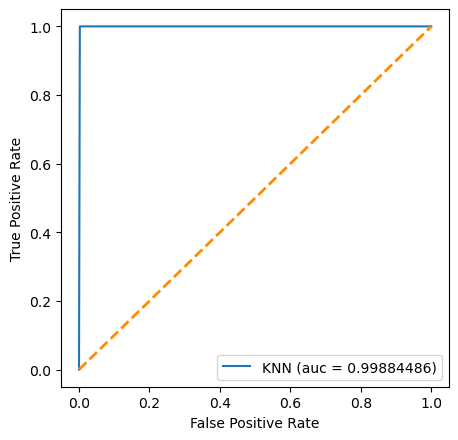

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

model_fpr, model_tpr, threshold = roc_curve(y_test, y_pred[:,1])
auc_model = auc(model_fpr, model_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(model_fpr, model_tpr, linestyle='-', label='KNN (auc = %0.8f)' % auc_model)
plt.plot([0, 1], [0, 1], color="darkorange", lw=2, linestyle="--")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()